In [1]:
from wand.image import Image as WImage
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
%matplotlib inline

In [2]:
chandon_log = WImage(filename='../geohack/Wells/Chandon-1/Chandon-1_WCR_nospace.pdf[130]')

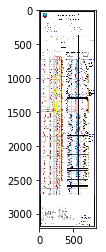

In [3]:
# Converting first page into JPG
chandon_log.save(filename="./temp.jpg")
chandon_jpg = Image.open('temp.jpg')
plt.imshow(chandon_jpg)

In [4]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/home/ubuntu/gkey/raslas-859d594053e6.json"

In [5]:
import io
import os

# Imports the Google Cloud client library
from google.cloud import vision
from google.cloud.vision import types

# Instantiates a client
client = vision.ImageAnnotatorClient()

In [6]:
# The name of the image file to annotate
Chandonjpg = 'temp.jpg'

# Loads the image into memory
with io.open(Chandonjpg, 'rb') as image_file:
    content = image_file.read()

image = types.Image(content=content)

# Performs label detection on the image file
response = client.label_detection(image=image)
labels = response.label_annotations

print('Labels:')
for label in labels:
    print(label.description)

Labels:
text
line
area
font
angle
diagram
point
plot
parallel


In [7]:
def detect_text(path):
    """Detects text in the file."""
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = types.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')
    ltext = []
    lvs = []
    for text in texts:
        print('\n"{}"'.format(text.description))
        ltext.append(text.description)
        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in text.bounding_poly.vertices])
        lvs.append(vertices)
        print('bounds: {}'.format(','.join(vertices)))
        
    return ltext, lvs

In [8]:
lt, lv = detect_text(Chandonjpg)

Texts:

"Evaluation Summary Plot
Well: CHANDON-1
LATITUDE: 019 34' 32.210" S
LONGITUDE: 114 07' 41.250" E
X COORDINATE:-
Y COORDINATE:
HORIZONTAL UNITS: METRES
MEASUREMENT REF. (KB/RT):-
TD DRILLER: 3124.0
VERTICAL UNITS: METRES
DATE LOGGED: 30-Jun-2006
VERTICAL SCALE: 1:500
DATE PLOTTED: 24-Jan-2007
GeneralDepth ResistvityPorosity&
Uithelegy
Core &
Test Dot0
Formation Pore Volume
Permeability Pay Summery Daio
Date
Break Down SaturationsMobilayand Intervols
2775
2875
2925
2950
> 10cc
2975
3025
3050
3075
RLO.ER Cer
panst nv(sireux corected〕
Evaluation Summary Plot
Well: CHANDON-1
"MUNGAROO FM UPPER"
A SAND BASE
Evaluated by
"
bounds: (39,56),(799,56),(799,3145),(39,3145)

"Evaluation"
bounds: (268,57),(409,57),(409,81),(268,81)

"Summary"
bounds: (420,57),(547,57),(547,85),(420,85)

"Plot"
bounds: (557,56),(610,56),(610,80),(557,80)

"Well:"
bounds: (271,123),(349,123),(349,149),(271,149)

"CHANDON-1"
bounds: (362,123),(576,123),(576,149),(362,149)

"LATITUDE:"
bounds: (90,192),(146,192

In [9]:
lv[0][0].strip('(').strip(')').split(',')

['39', '56']

In [10]:
lt[0]

'Evaluation Summary Plot\nWell: CHANDON-1\nLATITUDE: 019 34\' 32.210" S\nLONGITUDE: 114 07\' 41.250" E\nX COORDINATE:-\nY COORDINATE:\nHORIZONTAL UNITS: METRES\nMEASUREMENT REF. (KB/RT):-\nTD DRILLER: 3124.0\nVERTICAL UNITS: METRES\nDATE LOGGED: 30-Jun-2006\nVERTICAL SCALE: 1:500\nDATE PLOTTED: 24-Jan-2007\nGeneralDepth ResistvityPorosity&\nUithelegy\nCore &\nTest Dot0\nFormation Pore Volume\nPermeability Pay Summery Daio\nDate\nBreak Down SaturationsMobilayand Intervols\n2775\n2875\n2925\n2950\n> 10cc\n2975\n3025\n3050\n3075\nRLO.ER Cer\npanst nv(sireux corected〕\nEvaluation Summary Plot\nWell: CHANDON-1\n"MUNGAROO FM UPPER"\nA SAND BASE\nEvaluated by\n'

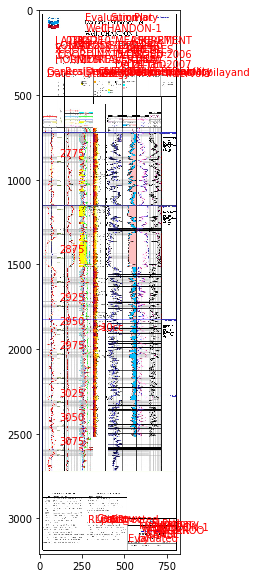

In [11]:
import matplotlib.pyplot as plt
img = plt.imread("temp.jpg")
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(img)
for i in range(len(lt)):
    if i!=0:
        tmp = lv[i][0].strip('(').strip(')').split(',')
        ax.text(float(tmp[0]),float(tmp[1]),lt[i],color="r")

plt.gcf().set_size_inches(14,10)
# plt.show()
plt.savefig("finalfull.jpg")